# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [99]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [101]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [106]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

df = pd.read_html(url)
mars_df = (df[0])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [107]:
mars_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [108]:
mars_fact_df = pd.DataFrame(mars_df)

In [109]:
# Extract all rows of data
mars_table = html_soup.find('table', class_="table")
mars_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [110]:
# Create an empty list
mars_facts = []
rows = mars_table.find_all('tr')

# Loop through the scraped data to create a list of rows
print(rows[1].text)

# mars_facts = {}
# rows = table.find_all('tr')

# # Loop through the rows
# for row in rows:
#     row_heading = row.find('th').text
#     row_data = row.find('td').text.strip()
#     mars_facts[row_heading] = row_data

# Loop through the rows
for i in rows:
    id_dict = i.find('td').text.strip()


    fact_dict = {
       id_dict
    }

    mars_facts.append(fact_dict)

# Loop through the rows
# for id, td, sol, ls, mo, min, p in rows:
#     id_dict = id.find('td').text.strip()
#     td_dict = td.find_next('td').text.strip()
#     sol_dict = sol.find_next('td').text.strip()
#     ls_dict = ls.find_next('td').text.strip()
#     mo_dict = mo.find_next('td').text.strip()
#     min_dict = min.find_next('td').text.strip()
#     p_dict = p.find_next('td').text.strip()

#     fact_dict = {
#         'id': id_dict,
#         'terrestrial_date': td_dict,
#         'sol': sol_dict,
#         'ls': ls_dict,
#         'month': mo_dict,
#         'min_temp': min_dict,
#         'pressure': p
#     }

#     mars_facts.append(fact_dict)


2
2012-08-16
10
155
6
-75.0
739.0



AttributeError: 'NoneType' object has no attribute 'text'

In [111]:
mars_facts

[]

In [112]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(df)

ValueError: Must pass 2-d input. shape=(1, 1867, 7)

In [113]:
# Confirm DataFrame was created successfully
mars_fact_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [114]:
# Examine data type of each column
mars_fact_df.dtypes


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [115]:
# Change data types for data analysis
# pd.to_datetime(mars_fact_df['terrestrial_date'])
mars_fact_df['terrestrial_date'] = mars_fact_df['terrestrial_date'].astype('datetime64[ns]')

In [116]:
# Confirm type changes were successful by examining data types again
mars_fact_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [117]:
# 1. How many months are there on Mars?
print(mars_fact_df['month'].max())


12


In [118]:
# 2. How many Martian days' worth of data are there?
print(mars_fact_df['sol'].nunique())

1867


In [120]:
# 3. What is the average low temperature by month?
min_temp = mars_fact_df.groupby(mars_fact_df['month'])['min_temp'].mean()
min_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

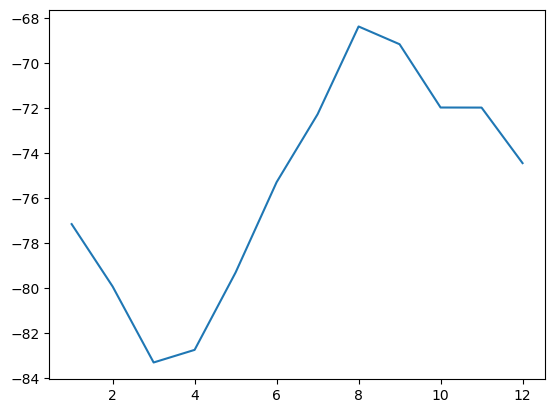

In [121]:
# Plot the average temperature by month
plt.plot(min_temp)
plt.show()


### Months with the minimum and maximum average temperature

The maximum temperature is -68.382979 in month **8**.

The minimum temperature is -83.307292 in month **3**.

In [122]:
# Identify the coldest and hottest months in Curiosity's location
month_data = pd.DataFrame(min_temp)
max_temp = month_data.loc[month_data['min_temp']==min_temp.max()]
min_temp = month_data.loc[month_data['min_temp']==min_temp.min()]
max_temp, min_temp


(        min_temp
 month           
 8     -68.382979,
         min_temp
 month           
 3     -83.307292)

In [123]:
# 4. Average pressure by Martian month
avg_p = mars_fact_df.groupby(mars_fact_df['month'])['pressure'].mean()
avg_p

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

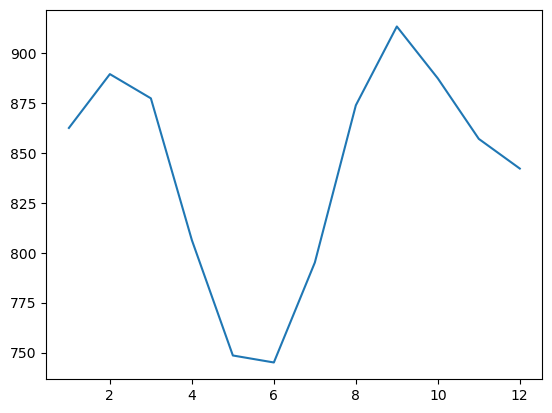

In [124]:
# Plot the average pressure by month
plt.plot(avg_p)
plt.show()


In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [126]:
# Write the data to a CSV
mars_fact_df.to_csv('Output/mars_facts.csv')


In [ ]:
browser.quit()